In [1]:
import random
from datetime import datetime
import numpy as np
import pandas as pd

In [2]:
number_of_records = 70000
date_time_list = []
response_list  = []
emotion_list   = []
outcome_list   = []

liss = []

for i in range(number_of_records):
    # day = random.randrange(1,30, 1)
    # month = random.randrange(1,12,1)
    day = 15
    month = 3
    
    hour = random.randrange(1,24,1)
    mins = random.randrange(0,60,1)
    sec  = random.randrange(0,60,1)

    date_time = f"{month}/{day}/24 {hour}:{mins}:{sec}"
    response = float(random.choice([1,0]))
    
    emotion  = random.choice([1,2,3,4,5])
    eqn = (hour/100)*emotion + (sec/100)
    
    emotion = eqn
    if emotion > 5:
        emotion = 5
    
    if emotion <= 1.5 or emotion <= 2. :
        outcome  = 0.0
    elif emotion == 3.5 or emotion == 4.5:
        outcome = float(random.choice([1,0]))
    elif emotion <= 5:
        outcome = 1.0

    lis = [date_time, response, emotion, outcome]
    liss.append(lis)

# lis = [date_time_list, response_list, emotion_list, outcome_list]
# lis = (np.array(lis)).reshape(1,-1)
df = pd.DataFrame(liss, columns = ["date_time", "response", "emotion", "outcome"])
df.index = pd.to_datetime(df["date_time"], format='%m/%d/%y %H:%M:%S')

df = df.sort_index(axis=0, ascending=True, inplace=False, kind='quicksort')
df

,date_time,response,emotion,outcome
date_time,,,,
2024-03-15 01:00:00,3/15/24 1:0:0,0.0,0.05,0.0
2024-03-15 01:00:02,3/15/24 1:0:2,1.0,0.03,0.0
2024-03-15 01:00:03,3/15/24 1:0:3,0.0,0.04,0.0
2024-03-15 01:00:03,3/15/24 1:0:3,0.0,0.08,0.0
2024-03-15 01:00:03,3/15/24 1:0:3,1.0,0.06,0.0
...,...,...,...,...
2024-03-15 23:59:53,3/15/24 23:59:53,1.0,0.99,0.0
2024-03-15 23:59:57,3/15/24 23:59:57,0.0,1.49,0.0
2024-03-15 23:59:57,3/15/24 23:59:57,0.0,1.72,0.0


In [3]:
min(df["emotion"]), max(df["emotion"])

(0.01, 1.7400000000000002)

In [4]:
df["emotion"]

date_time
2024-03-15 01:00:00    0.05
2024-03-15 01:00:02    0.03
2024-03-15 01:00:03    0.04
2024-03-15 01:00:03    0.08
2024-03-15 01:00:03    0.06
                       ... 
2024-03-15 23:59:53    0.99
2024-03-15 23:59:57    1.49
2024-03-15 23:59:57    1.72
2024-03-15 23:59:57    1.03
2024-03-15 23:59:59    0.82
Name: emotion, Length: 70000, dtype: float64

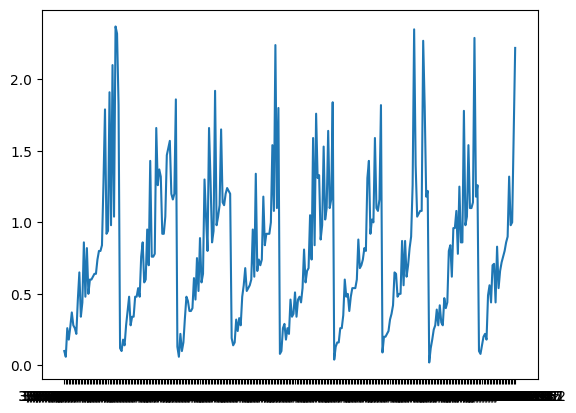

In [5]:
import matplotlib.pyplot as plt

date_time_dict = {}
for i, j in zip(df["date_time"], df['emotion']):
    date_time_dict[i] = j
for i, j in zip(df["date_time"], df['emotion']):
    date_time_dict[i] += j
    
plt.plot(list(date_time_dict.keys())[:300], list(date_time_dict.values())[:300])

In [6]:
np.shape(np.array(df))

(70000, 4)

In [7]:
np.shape(df.to_numpy())

(70000, 4)

In [8]:
def df_to_X_y(df, window_size=5):
    df_as_np = np.array(df)
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [9]:
WINDOW_SIZE = 5
X, y = df_to_X_y(df['emotion'], WINDOW_SIZE)
X.shape,y.shape

((69995, 5, 1), (69995,))

In [10]:
X_train, y_train = X[:60000], y[:60000]
X_val,y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

X_train.shape,y_train.shape

((60000, 5, 1), (60000,))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [12]:
model = Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [13]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [15]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, callbacks=[cp])

Epoch 1/25
1868/1875 [============================>.] - ETA: 0s - loss: 0.0412 - root_mean_squared_error: 0.2030

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 15s 5ms/step - loss: 0.0412 - root_mean_squared_error: 0.2030 - val_loss: 0.1189 - val_root_mean_squared_error: 0.3448
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - root_mean_squared_error: 0.2030 - val_loss: 0.1197 - val_root_mean_squared_error: 0.3460
Epoch 3/25
1867/1875 [============================>.] - ETA: 0s - loss: 0.0412 - root_mean_squared_error: 0.2030

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0412 - root_mean_squared_error: 0.2030 - val_loss: 0.1184 - val_root_mean_squared_error: 0.3441
Epoch 4/25
1875/1875 [==============================] - ETA: 0s - loss: 0.0412 - root_mean_squared_error: 0.2029

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0412 - root_mean_squared_error: 0.2029 - val_loss: 0.1159 - val_root_mean_squared_error: 0.3405
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - root_mean_squared_error: 0.2029 - val_loss: 0.1228 - val_root_mean_squared_error: 0.3504
Epoch 6/25
1862/1875 [============================>.] - ETA: 0s - loss: 0.0412 - root_mean_squared_error: 0.2029

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0412 - root_mean_squared_error: 0.2029 - val_loss: 0.1157 - val_root_mean_squared_error: 0.3401
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028 - val_loss: 0.1177 - val_root_mean_squared_error: 0.3431
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028 - val_loss: 0.1177 - val_root_mean_squared_error: 0.3431
Epoch 9/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - root_mean_squared_error: 0.2029 - val_loss: 0.1233 - val_root_mean_squared_error: 0.3512
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028 - val_loss: 0.1164 - val_root_mean_squared_error: 0.3412
Epoch 11/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028 - val_loss: 0.1164 - v

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0411 - root_mean_squared_error: 0.2027 - val_loss: 0.1145 - val_root_mean_squared_error: 0.3384
Epoch 15/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028 - val_loss: 0.1176 - val_root_mean_squared_error: 0.3429
Epoch 16/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0411 - root_mean_squared_error: 0.2027 - val_loss: 0.1193 - val_root_mean_squared_error: 0.3454
Epoch 17/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0411 - root_mean_squared_error: 0.2026 - val_loss: 0.1160 - val_root_mean_squared_error: 0.3406
Epoch 18/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - root_mean_squared_error: 0.2027 - val_loss: 0.1169 - val_root_mean_squared_error: 0.3419
Epoch 19/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - root_mean_squared_error: 0.2026 - val_loss: 0.1171 

In [16]:
model = load_model('model/')

In [19]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data = {"Train Predictions":train_predictions, "Actuals":y_train})
train_results

1875/1875 [==============================] - 3s 1ms/step


,Train Predictions,Actuals
0,0.076366,0.04
1,0.076629,0.09
2,0.086268,0.09
3,0.097209,0.09
4,0.102894,0.08
...,...,...
59995,1.040100,0.94
59996,1.075891,0.94
59997,1.010947,1.18
59998,0.976748,1.59


In [18]:
train_predictions.flatten()

array([0.07636607, 0.07662936, 0.08626812, ..., 1.0109465 , 0.9767479 ,
       1.1206794 ], dtype=float32)